# Graded Challenge 2

`Nurrahmawati Batch 002`

## Description

### Objective

`I am a member of the Data Science team at Austin Smart City and am currently working on a project to analyze the waste management and disposal system in the city, especially in the management of garbage collection and single stream recycling. As a team member, based on the available data, I tried to analyze the data using descriptive and inferential statistics, as well as provide insight to the city of Austin regarding the state of the waste disposal and management system.`

## Working Area
### DATA EXTRACTION

Data extraction from Bigquery using Google Cloud Platform (Bigquery-public-data table waste_and_diversion based on dataset in austin_waste ) 
```txt
SELECT report_date,
      load_time,
      load_type,
      load_weight,
      dropoff_site
FROM `bigquery-public-data.austin_waste.waste_and_diversion` 
WHERE report_date BETWEEN '2021-01-01' AND '2021-07-09'
ORDER BY report_date ASC
```
From this data extraction, I take this data since 01 January 2021 to 09 July 2021 with attributes (columns) report_date, load_time, load_type, load_weight, and dropoff_site to make further analysis.

# Working Station Problem 1 (Statistics)
### Libraries to be used in the analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Loading
### Creating the data frame and showing the head and tail of the data

In [2]:
df = pd.read_csv('h8dsft_P0GC2_Nurrahmawati.csv')
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


From the results of the data extraction, then loading the data in the form of csv to be displayed so that the data can be processed for further analysis. The data consists of 26157 rows and 5 columns.

In [3]:
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF


From this data, we can see that the data is showed by 5 rows in sequence from above

In [4]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26156,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL


Data is displayed in 5 rows in sequence from the bottom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


From the info, we can see that the load_weight data does not match the other attributes:
### The load data does not represent all 26157 data of other attributes. For load_weight data is showing a great discrepancy with only 25109 entries data.

# DATA CLEANING
## Missing Value Handling

```text
Since this is missing values in the load_weight columns. Let us explore whether there are other missing values or not
```

In [6]:
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

```text
While there are no standard missing value in other columns, I have discovered that there are 1048 missing values of the load_weight columns.

Since the "0" in the columns does not represent missing value. 
```

---

There are several methods to perform null value handling. The two most common methods are drop and fill.

The `drop function` will remove all null values in the dataset while the `fill function` will fill the null values with the desired value.

Before choosing the method to be used, I will do a little analysis of the dataset that has been loaded.

In [7]:
df[df.isna().any(axis=1)]

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
8,2021-01-02,2021-01-02 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
...,...,...,...,...,...
26131,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
26132,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
26133,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
26134,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK


By using the `isna` function, I get the result that most of the null values come from the `load_type` column with category `SWEEPING`.

The `isna` function is used to find null values in the dataset and by using the `axis = 1` parameter, the search will be based on the columns in the dataset.

Next, I will calculate how significant is `load_type` sweeping is on the dataset in order to maintain the distribution of the data.

In [8]:
# count the frequency of occurrence of each category on `load_type` in the dataset

df['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

I assume the `SWEEPING` category in `load_type` is an activity such as sweeping the road or sweeping certain sites with large numbers of load types on certain sites. And because of that I will fill the null value in the `SWEEPING` category with a value of 0.

In [9]:
df['load_weight'] = df['load_weight'].fillna(0)

In [10]:
df.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

In [11]:
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,0.0,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,0.0,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,0.0,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,0.0,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


---

In [12]:
min_date = df['report_date'].min()
min_date

'2021-01-01'

In [13]:
max_date = df['report_date'].max()
max_date

'2021-07-09'

In [14]:
print(f'Rentang waktu dari pengambilan data ini dimulai pada tanggal {min_date} hingga {max_date}')

Rentang waktu dari pengambilan data ini dimulai pada tanggal 2021-01-01 hingga 2021-07-09


From this data, it can be shown that the data retrieval time span in this analysis is only on January 1, 2021 to July 09, 2021, by looking at the minimum and maximum dates in this data.

In [15]:
df['dropoff_site'].unique()

array(['ONION CREEK', 'MRF', 'TDS - MRF', 'HORNSBY BEND', 'TDS LANDFILL',
       'ORGANICS BY GOSH', 'BALCONES RECYCLING', 'AUSTIN IRON AND METAL',
       'PARK CENTER', 'ON ROUTE HIGH DUMP', 'WILCAB', 'GREAT NORTHERN',
       'AUSTIN WOOD RECYCLING', 'PARK BEND', 'BALCONES WOODS',
       'STEINER LANDFILL', 'WESTFIELD', 'ST. EDWARDS'], dtype=object)

from this unique, We could know the dropoff site places in the Austin Smart City

In [16]:
df['load_type'].unique()

array(['SWEEPING', 'TIRES', 'RECYCLING - SINGLE STREAM', 'YARD TRIMMING',
       'BULK', 'DEAD ANIMAL', 'GARBAGE COLLECTIONS', 'MIXED LITTER',
       'ORGANICS', 'BRUSH', 'RECYCLED METAL', 'LITTER',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

besides that, We also could know load type in the Austin Smart City

---

After the dataset is cleared of null values, I will now calculate the central tendency of the dataset.

Central Tendency is a value that shows the midpoint of a dataset to find out where the position of many data values gather in the distribution. The Mean, Median, and Mode values are the most commonly used measures of Central Tendency. 

In [17]:
df['dropoff_site'].mode()

0    TDS LANDFILL
Name: dropoff_site, dtype: object

In [18]:
mean = df.groupby('dropoff_site')['load_weight'].apply(pd.Series.mean)
mean

dropoff_site
AUSTIN IRON AND METAL      451.200000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
GREAT NORTHERN            1641.714286
HORNSBY BEND              6616.628399
MRF                       1799.982143
ON ROUTE HIGH DUMP        1082.469136
ONION CREEK                  0.000000
ORGANICS BY GOSH         11789.731712
PARK BEND                13385.000000
PARK CENTER                  0.000000
ST. EDWARDS                  0.000000
STEINER LANDFILL           780.000000
TDS - MRF                 9872.550882
TDS LANDFILL             15165.151724
WESTFIELD                16020.000000
WILCAB                       0.000000
Name: load_weight, dtype: float64

In [19]:
median = df.groupby('dropoff_site')[['load_weight']].median()
median

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,400.0
AUSTIN WOOD RECYCLING,4050.0
BALCONES RECYCLING,9840.0
BALCONES WOODS,8460.0
GREAT NORTHERN,0.0
HORNSBY BEND,6380.0
MRF,1360.0
ON ROUTE HIGH DUMP,0.0
ONION CREEK,0.0


From calculating the central tendency for each dropoff site, we may get information about something like **a glimpse of the data distribution**.

For example, i will take the mean and median of `TDS LANDFILL` as largest mode. The mean is 15165.2 kg and the median is 14920 kg. It is possible that the weight of the waste disposed of in `TDS LANDFILL` varies each time it receives disposal so that there is a difference between the median and the average. 

In [20]:
modus_loadtype = df.groupby('dropoff_site')['load_type'].apply(pd.Series.mode)
modus_loadtype

dropoff_site            
AUSTIN IRON AND METAL  0               RECYCLED METAL
AUSTIN WOOD RECYCLING  0    RECYCLING - SINGLE STREAM
BALCONES RECYCLING     0    RECYCLING - SINGLE STREAM
BALCONES WOODS         0    RECYCLING - SINGLE STREAM
GREAT NORTHERN         0                     SWEEPING
HORNSBY BEND           0                        BRUSH
MRF                    0                        TIRES
ON ROUTE HIGH DUMP     0                     SWEEPING
ONION CREEK            0                     SWEEPING
ORGANICS BY GOSH       0                     ORGANICS
PARK BEND              0                     ORGANICS
PARK CENTER            0                     SWEEPING
ST. EDWARDS            0                     SWEEPING
STEINER LANDFILL       0          GARBAGE COLLECTIONS
TDS - MRF              0    RECYCLING - SINGLE STREAM
TDS LANDFILL           0          GARBAGE COLLECTIONS
WESTFIELD              0          GARBAGE COLLECTIONS
WILCAB                 0                     SWEEPING
Nam

Above this, I have also looked for the mode for the `load_type` column because I want to focus the analysis for waste management on garbage collections and recycling single streams.

## SAMPLE 1

I am slicing `Austin Wood Recycling, Balcones Recycling, Balcones Woods, and TDS - MRF` data from variable `df` into a new variable called `recycling_single_stream`.

In [21]:
AWR = df[df['dropoff_site']=='AUSTIN WOOD RECYCLING']
AWR

,report_date,load_time,load_type,load_weight,dropoff_site
4485,2021-02-03,2021-02-03 02:05:00 UTC,RECYCLING - SINGLE STREAM,2340.0,AUSTIN WOOD RECYCLING
24620,2021-06-25,2021-06-25 11:45:00 UTC,RECYCLING - SINGLE STREAM,5760.0,AUSTIN WOOD RECYCLING


In [22]:
BW = df[df['dropoff_site']=='BALCONES WOODS']
BW

,report_date,load_time,load_type,load_weight,dropoff_site
13853,2021-04-09,2021-04-09 12:00:00 UTC,RECYCLING - SINGLE STREAM,8460.0,BALCONES WOODS


In [23]:
BR = df[df['dropoff_site']=='BALCONES RECYCLING']
BR

,report_date,load_time,load_type,load_weight,dropoff_site
111,2021-01-02,2021-01-02 12:22:00 UTC,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING
112,2021-01-02,2021-01-02 12:45:00 UTC,RECYCLING - SINGLE STREAM,8500.0,BALCONES RECYCLING
113,2021-01-02,2021-01-02 11:55:00 UTC,RECYCLING - SINGLE STREAM,5020.0,BALCONES RECYCLING
114,2021-01-02,2021-01-02 11:48:00 UTC,RECYCLING - SINGLE STREAM,4440.0,BALCONES RECYCLING
115,2021-01-02,2021-01-02 09:58:00 UTC,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
...,...,...,...,...,...
26002,2021-07-07,2021-07-07 02:00:00 UTC,RECYCLING - SINGLE STREAM,4540.0,BALCONES RECYCLING
26003,2021-07-07,2021-07-07 10:00:00 UTC,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
26004,2021-07-07,2021-07-07 12:00:00 UTC,RECYCLING - SINGLE STREAM,4740.0,BALCONES RECYCLING
26005,2021-07-07,2021-07-07 09:00:00 UTC,RECYCLING - SINGLE STREAM,9200.0,BALCONES RECYCLING


In [24]:
BR.loc[BR["dropoff_site"] == "BALCONES RECYCLING", "load_type"].value_counts()

RECYCLING - SINGLE STREAM    3837
Name: load_type, dtype: int64

In [25]:
TDS_MRF = df[df['dropoff_site']=='TDS - MRF']
TDS_MRF

,report_date,load_time,load_type,load_weight,dropoff_site
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
164,2021-01-04,2021-01-04 10:08:00 UTC,RECYCLING - SINGLE STREAM,5820.0,TDS - MRF
165,2021-01-04,2021-01-04 12:43:00 UTC,RECYCLING - SINGLE STREAM,1640.0,TDS - MRF
166,2021-01-04,2021-01-04 12:21:00 UTC,RECYCLING - SINGLE STREAM,5420.0,TDS - MRF
...,...,...,...,...,...
25728,2021-07-06,2021-07-06 10:00:00 UTC,RECYCLING - SINGLE STREAM,9080.0,TDS - MRF
25729,2021-07-06,2021-07-06 09:00:00 UTC,RECYCLING - SINGLE STREAM,12840.0,TDS - MRF
25730,2021-07-06,2021-07-06 02:00:00 UTC,RECYCLING - SINGLE STREAM,10200.0,TDS - MRF
25863,2021-07-07,2021-07-07 02:00:00 UTC,RECYCLING - SINGLE STREAM,5340.0,TDS - MRF


In [26]:
TDS_MRF.loc[TDS_MRF["dropoff_site"] == "TDS - MRF", "load_type"].value_counts()

RECYCLING - SINGLE STREAM    2917
GARBAGE COLLECTIONS            28
BULK                            2
LITTER                          1
Name: load_type, dtype: int64

In [27]:
TDS_MRF.drop(TDS_MRF[(TDS_MRF.load_type == "GARBAGE COLLECTIONS")].index, inplace=True)
TDS_MRF.drop(TDS_MRF[(TDS_MRF.load_type == "BULK")].index, inplace=True)
TDS_MRF.drop(TDS_MRF[(TDS_MRF.load_type == "LITTER")].index, inplace=True)
TDS_MRF

,report_date,load_time,load_type,load_weight,dropoff_site
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
164,2021-01-04,2021-01-04 10:08:00 UTC,RECYCLING - SINGLE STREAM,5820.0,TDS - MRF
165,2021-01-04,2021-01-04 12:43:00 UTC,RECYCLING - SINGLE STREAM,1640.0,TDS - MRF
166,2021-01-04,2021-01-04 12:21:00 UTC,RECYCLING - SINGLE STREAM,5420.0,TDS - MRF
...,...,...,...,...,...
25728,2021-07-06,2021-07-06 10:00:00 UTC,RECYCLING - SINGLE STREAM,9080.0,TDS - MRF
25729,2021-07-06,2021-07-06 09:00:00 UTC,RECYCLING - SINGLE STREAM,12840.0,TDS - MRF
25730,2021-07-06,2021-07-06 02:00:00 UTC,RECYCLING - SINGLE STREAM,10200.0,TDS - MRF
25863,2021-07-07,2021-07-07 02:00:00 UTC,RECYCLING - SINGLE STREAM,5340.0,TDS - MRF


As specially `TDS - MRF`, I removed the load type **Garbage collections, bulk, and litter** because I wanted to focus on the analysis of sample 1 which recycles single streams.

In [28]:
recycling_single_stream = pd.concat([AWR, BR, BW, TDS_MRF], axis=0)
recycling_single_stream

,report_date,load_time,load_type,load_weight,dropoff_site
4485,2021-02-03,2021-02-03 02:05:00 UTC,RECYCLING - SINGLE STREAM,2340.0,AUSTIN WOOD RECYCLING
24620,2021-06-25,2021-06-25 11:45:00 UTC,RECYCLING - SINGLE STREAM,5760.0,AUSTIN WOOD RECYCLING
111,2021-01-02,2021-01-02 12:22:00 UTC,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING
112,2021-01-02,2021-01-02 12:45:00 UTC,RECYCLING - SINGLE STREAM,8500.0,BALCONES RECYCLING
113,2021-01-02,2021-01-02 11:55:00 UTC,RECYCLING - SINGLE STREAM,5020.0,BALCONES RECYCLING
...,...,...,...,...,...
25728,2021-07-06,2021-07-06 10:00:00 UTC,RECYCLING - SINGLE STREAM,9080.0,TDS - MRF
25729,2021-07-06,2021-07-06 09:00:00 UTC,RECYCLING - SINGLE STREAM,12840.0,TDS - MRF
25730,2021-07-06,2021-07-06 02:00:00 UTC,RECYCLING - SINGLE STREAM,10200.0,TDS - MRF
25863,2021-07-07,2021-07-07 02:00:00 UTC,RECYCLING - SINGLE STREAM,5340.0,TDS - MRF


From the combined data of four dropoff sites with load type recycling single stream, it obtained 6757 rows and 5 columns

Now I will further analyze the data already stored in the `recycling_single_stream` variable.

The analysis that will be carried out is to calculate the central tendency and also the standard deviation of the variable `recycling_single_stream`. This is done to see the distribution of data in `recycling_single_stream`.

In [29]:
mean_satu = recycling_single_stream['load_weight'].mean()
median_satu = recycling_single_stream['load_weight'].median()
modus_satu = recycling_single_stream['load_weight'].mode()[0]
standar_deviasi_satu = recycling_single_stream['load_weight'].std()
min_satu = recycling_single_stream['load_weight'].min()
max_satu = recycling_single_stream['load_weight'].max()

print(f'rata-rata : {mean_satu}')
print(f'median : {median_satu}')
print(f'modus : {modus_satu}')
print(f'standar deviasi : {standar_deviasi_satu}')
print(f'min : {min_satu}')
print(f'max : {max_satu}')

rata-rata : 9611.764096492527
median : 10040.0
modus : 11880.0
standar deviasi : 3917.6245538657477
min : 40.0
max : 27060.0


Now I will calculate the skew value in the `load_weight` column of the `recycling_single_stream` data. This skew value is used to determine whether a data has a normal or skewed data distribution. If the skew value is above 0.5 to 1 then the data is right skewed data, while if the skew value is below -0.5 to -1 then the data distribution is left skewed.

In [30]:
print(recycling_single_stream['load_weight'].skew())

0.06053444968048845


Because the `recycling_single_stream` data has a skewness value of 0.0605, the data has a normal distribution.

To provide a better visualization of the `recycling_single_stream` data, I will plot the `recycling_single_stream` data.

<function matplotlib.pyplot.show(close=None, block=None)>

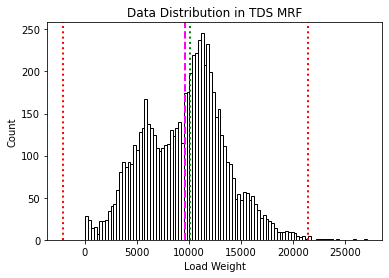

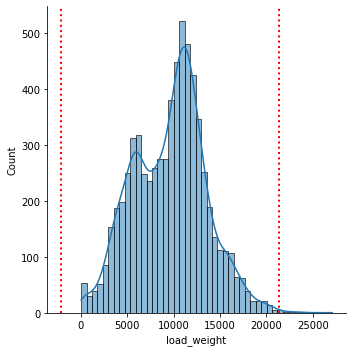

In [31]:
### HISTOGRAM DENGAN AXIS LINE
a = recycling_single_stream['load_weight']
plt.hist(recycling_single_stream['load_weight'], color = 'white', edgecolor = 'black',
         bins = int(500/5))

plt.title('Data Distribution in TDS MRF')
plt.xlabel('Load Weight')
plt.ylabel('Count')
plt.axvline(a.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(a.median(), color='green', linestyle='dotted', linewidth=2)
plt.axvline(a.mean()+3*a.std(), color='red', linestyle='dotted', linewidth=2)
plt.axvline(a.mean()-3*a.std(), color='red', linestyle='dotted', linewidth=2)
plt.show


### displot
sns.displot(recycling_single_stream.load_weight, kde=True, label='Load Weight in TDS MRF')
plt.axvline(a.mean()+3*a.std(), color='red', linestyle='dotted', linewidth=2)
plt.axvline(a.mean()-3*a.std(), color='red', linestyle='dotted', linewidth=2)
plt.show

There are outliers in the `recycling_single_stream` data in the normal distribution. Outliers are data points that are far from other data points.

The next step to do is to handle outliers.

Some popular concepts for dealing with outliers are:

- Dropping outliers
- Limit them - i.e. define max/min point and assign that value to outlier. This applies if the data shows that after some point the larger/smaller value does not change the result.
- Double check - they could have entered the value incorrectly or so.

In [32]:
recycling_single_stream['Z-Score'] = stats.zscore(recycling_single_stream['load_weight'])
recycling_single_stream

,report_date,load_time,load_type,load_weight,dropoff_site,Z-Score
4485,2021-02-03,2021-02-03 02:05:00 UTC,RECYCLING - SINGLE STREAM,2340.0,AUSTIN WOOD RECYCLING,-1.856304
24620,2021-06-25,2021-06-25 11:45:00 UTC,RECYCLING - SINGLE STREAM,5760.0,AUSTIN WOOD RECYCLING,-0.983261
111,2021-01-02,2021-01-02 12:22:00 UTC,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING,-0.217435
112,2021-01-02,2021-01-02 12:45:00 UTC,RECYCLING - SINGLE STREAM,8500.0,BALCONES RECYCLING,-0.283806
113,2021-01-02,2021-01-02 11:55:00 UTC,RECYCLING - SINGLE STREAM,5020.0,BALCONES RECYCLING,-1.172165
...,...,...,...,...,...,...
25728,2021-07-06,2021-07-06 10:00:00 UTC,RECYCLING - SINGLE STREAM,9080.0,TDS - MRF,-0.135746
25729,2021-07-06,2021-07-06 09:00:00 UTC,RECYCLING - SINGLE STREAM,12840.0,TDS - MRF,0.824090
25730,2021-07-06,2021-07-06 02:00:00 UTC,RECYCLING - SINGLE STREAM,10200.0,TDS - MRF,0.150162
25863,2021-07-07,2021-07-07 02:00:00 UTC,RECYCLING - SINGLE STREAM,5340.0,TDS - MRF,-1.090477


In [33]:
recycling_single_stream[(recycling_single_stream['Z-Score']>3)| (recycling_single_stream['Z-Score']<-3)]

,report_date,load_time,load_type,load_weight,dropoff_site,Z-Score
891,2021-01-07,2021-01-05 02:05:00 UTC,RECYCLING - SINGLE STREAM,21400.0,BALCONES RECYCLING,3.009249
900,2021-01-07,2021-01-07 12:20:00 UTC,RECYCLING - SINGLE STREAM,21400.0,BALCONES RECYCLING,3.009249
18569,2021-05-12,2021-05-12 01:03:00 UTC,RECYCLING - SINGLE STREAM,23240.0,BALCONES RECYCLING,3.478956
20469,2021-05-26,2021-05-26 01:45:00 UTC,RECYCLING - SINGLE STREAM,21470.0,BALCONES RECYCLING,3.027118
22295,2021-06-09,2021-06-09 01:55:00 UTC,RECYCLING - SINGLE STREAM,25780.0,BALCONES RECYCLING,4.127356
22302,2021-06-09,2021-06-09 01:44:00 UTC,RECYCLING - SINGLE STREAM,22480.0,BALCONES RECYCLING,3.284947
397,2021-01-05,2021-01-05 02:00:00 UTC,RECYCLING - SINGLE STREAM,22800.0,TDS - MRF,3.366635
4151,2021-02-02,2021-02-02 02:07:00 UTC,RECYCLING - SINGLE STREAM,21520.0,TDS - MRF,3.039882
20866,2021-05-31,2021-05-31 02:15:00 UTC,RECYCLING - SINGLE STREAM,23320.0,TDS - MRF,3.499378
20870,2021-05-31,2021-05-31 01:01:00 UTC,RECYCLING - SINGLE STREAM,22280.0,TDS - MRF,3.233892


In [34]:
recycling_single_stream[(recycling_single_stream['Z-Score']>3)| (recycling_single_stream['Z-Score']<-3)].count()

report_date     14
load_time       14
load_type       14
load_weight     14
dropoff_site    14
Z-Score         14
dtype: int64

In [35]:
# PERCENTILES OF THE OUTLIERS

data_outlier_satu = recycling_single_stream[(recycling_single_stream['Z-Score']>3)| (recycling_single_stream['Z-Score']<-3)]
jumlah_data_outlier_satu = data_outlier_satu.load_weight.count()
jumlah_data_recycling_single_stream = recycling_single_stream.load_weight.count()

outliers_percentage_satu = (jumlah_data_outlier_satu/jumlah_data_recycling_single_stream)*100
outliers_percentage_satu

0.20719254106852156

In the `recycling_single_stream` data, the number of outliers in the data only adds up to 14 data. Data `recycling_single_stream` has a total of 6757 rows of data. **The percentage of extreme value is 0.21% of the total data**. The number of extreme value is still small when compared to the total amount of data. So I will use the capping method to handle the extreme values. 

Since the right-hand `recycling_single_stream` data crosses its limit, the way to detect outliers is to use the z-score, first look for the z-score then look at the outliers by filtering the data for z-scores greater than -3 to 3

In [36]:
outliers_L = (recycling_single_stream.load_weight.mean()) - (3 * (recycling_single_stream.load_weight.std()))
outliers_R = (recycling_single_stream.load_weight.mean()) + (3 * (recycling_single_stream.load_weight.std()))
outliers_R

21364.637758089768

In [37]:
recycling_single_stream["load_weight"] = np.where(recycling_single_stream['load_weight']>21364.0, 21364.0,recycling_single_stream['load_weight'])

In [38]:
recycling_single_stream['load_weight'].max()

21364.0

The command above has done the capping of the existing outliers with proven maximum value changed to 21364.0

Below is the plotting of `recycling_single_stream` data after capping.

<function matplotlib.pyplot.show(close=None, block=None)>

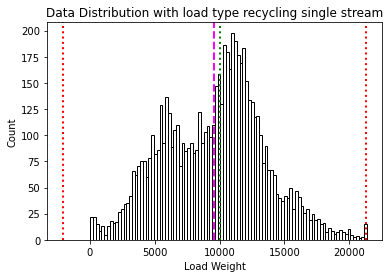

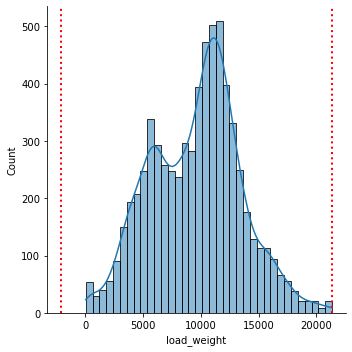

In [39]:
### HISTOGRAM DENGAN AXIS LINE
a = recycling_single_stream['load_weight']
plt.hist(recycling_single_stream['load_weight'], color = 'white', edgecolor = 'black',
         bins = int(500/5))

plt.title('Data Distribution with load type recycling single stream')
plt.xlabel('Load Weight')
plt.ylabel('Count')
plt.axvline(a.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(a.median(), color='green', linestyle='dotted', linewidth=2)
plt.axvline(a.mean()+3*a.std(), color='red', linestyle='dotted', linewidth=2)
plt.axvline(a.mean()-3*a.std(), color='red', linestyle='dotted', linewidth=2)
plt.show


### displot
sns.displot(recycling_single_stream.load_weight, kde=True, label='Load Weight in TDS MRF')
plt.axvline(a.mean()+3*a.std(), color='red', linestyle='dotted', linewidth=2)
plt.axvline(a.mean()-3*a.std(), color='red', linestyle='dotted', linewidth=2)
plt.show

**The following is a comparison of the mean, median, and mode of the data `recycling_single_stream` with outliers and `recycling_single_stream` without any extreme values.**

In [40]:
mean_satu_new = recycling_single_stream['load_weight'].mean()
median_satu_new = recycling_single_stream['load_weight'].median()
modus_satu_new = recycling_single_stream['load_weight'].mode()[0]

print(f'rata-rata : {mean_satu_new}')
print(f'median : {median_satu_new}')
print(f'modus : {modus_satu_new}')

rata-rata : 9608.349267426373
median : 10040.0
modus : 11880.0


In [41]:
perbandingan = pd.DataFrame({'Data Condition': ['With Outliers', 'Without Outliers'],
                   'Mean':[mean_satu,mean_satu_new],
                   'Median':[median_satu,median_satu_new],
                   'Modus':[modus_satu,modus_satu_new]
                   })
perbandingan

,Data Condition,Mean,Median,Modus
0,With Outliers,9611.764096,10040.0,11880.0
1,Without Outliers,9608.349267,10040.0,11880.0


Since the data is clear of extreme values, I will now calculate the range, variance, and standard deviation values.

In [42]:
max_recycling_single_stream = recycling_single_stream['load_weight'].max()
min_recycling_single_stream = recycling_single_stream['load_weight'].min()

range_recycling_single_stream = max_recycling_single_stream - min_recycling_single_stream
range_recycling_single_stream

21324.0

In [43]:
Variance = recycling_single_stream["load_weight"].var()
Variance

15256071.094098438

In [44]:
std = recycling_single_stream["load_weight"].std()
std

3905.9020845508194

**From the results above, the information obtained is the diversity of the weight of waste disposal at the recycling single stream type, the value of waste disposal at the recycling single stream type is far from the average value.**


The standard deviation is derived from variance and tells you, on average, how far each value lies from the mean.

Both measures reflect variability in a distribution, but their units differ:

- **Standard deviation** is expressed in the same units as the original values (e.g., meters).
- **Variance is expressed** in much larger units (e.g., meters squared)

Since the units of variance are much larger than those of a typical value of a data set, it’s harder to interpret the variance number intuitively. That’s why standard deviation is often preferred as a main measure of variability.

However, the variance is more informative about variability than the standard deviation, and it’s used in making statistical inferences.

---

Now if the city government plans to add a new site. I have to provide analysis and suggestions regarding the amount of storage capacity at the new site based on the calculation of the confidence interval.

In [45]:
ci = stats.norm.interval(0.95, recycling_single_stream['load_weight'].mean(), recycling_single_stream['load_weight'].std())
ci

(1952.9218545668455, 17263.7766802859)

## SAMPLE 2

I am slicing `Steiner Landfill, Westfield, and TDS Landfill` data from variable `df` into a new variable called `garbage_collections`.

In [46]:
SL = df[df['dropoff_site']=='STEINER LANDFILL']
SL

,report_date,load_time,load_type,load_weight,dropoff_site
14591,2021-04-14,2021-04-14 11:35:00 UTC,GARBAGE COLLECTIONS,780.0,STEINER LANDFILL


In [47]:
WF = df[df['dropoff_site']=='WESTFIELD']
WF

,report_date,load_time,load_type,load_weight,dropoff_site
19600,2021-05-20,2021-05-20 11:25:00 UTC,GARBAGE COLLECTIONS,16020.0,WESTFIELD


In [48]:
TDS_LANDFILL = df[df['dropoff_site']=='TDS LANDFILL']
TDS_LANDFILL

,report_date,load_time,load_type,load_weight,dropoff_site
16,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL
17,2021-01-02,2021-01-02 12:25:00 UTC,BULK,10200.0,TDS LANDFILL
18,2021-01-02,2021-01-02 02:13:00 UTC,BULK,5440.0,TDS LANDFILL
19,2021-01-02,2021-01-02 04:27:00 UTC,DEAD ANIMAL,140.0,TDS LANDFILL
20,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL
...,...,...,...,...,...
26097,2021-07-08,2021-07-08 02:04:00 UTC,GARBAGE COLLECTIONS,8380.0,TDS LANDFILL
26098,2021-07-08,2021-07-08 02:27:00 UTC,BULK,2100.0,TDS LANDFILL
26099,2021-07-08,2021-07-08 11:07:00 UTC,BULK,3500.0,TDS LANDFILL
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


In [49]:
TDS_LANDFILL.loc[TDS_LANDFILL["dropoff_site"] == "TDS LANDFILL", "load_type"].value_counts()

GARBAGE COLLECTIONS          8204
BULK                         1590
SWEEPING                      360
MIXED LITTER                  329
DEAD ANIMAL                   131
LITTER                         40
ORGANICS                       22
TIRES                          10
RECYCLING - SINGLE STREAM       3
BRUSH                           2
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
RECYCLED METAL                  1
Name: load_type, dtype: int64

In [50]:
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "BULK")].index, inplace=True)
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "SWEEPING")].index, inplace=True)
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "MIXED LITTER")].index, inplace=True)
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "DEAD ANIMAL")].index, inplace=True)
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "LITTER")].index, inplace=True)
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "ORGANICS")].index, inplace=True)
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "TIRES")].index, inplace=True)
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "RECYCLING - SINGLE STREAM")].index, inplace=True)
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "BRUSH")].index, inplace=True)
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "CONTAMINATED RECYCLING")].index, inplace=True)
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "CONTAMINATED ORGANICS")].index, inplace=True)
TDS_LANDFILL.drop(TDS_LANDFILL[(TDS_LANDFILL.load_type == "RECYCLED METAL")].index, inplace=True)
TDS_LANDFILL

,report_date,load_time,load_type,load_weight,dropoff_site
20,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL
21,2021-01-02,2021-01-02 12:00:00 UTC,GARBAGE COLLECTIONS,13020.0,TDS LANDFILL
22,2021-01-02,2021-01-02 01:34:00 UTC,GARBAGE COLLECTIONS,17340.0,TDS LANDFILL
23,2021-01-02,2021-01-02 01:19:00 UTC,GARBAGE COLLECTIONS,19300.0,TDS LANDFILL
24,2021-01-02,2021-01-02 10:24:00 UTC,GARBAGE COLLECTIONS,22500.0,TDS LANDFILL
...,...,...,...,...,...
26093,2021-07-08,2021-07-08 11:10:00 UTC,GARBAGE COLLECTIONS,14500.0,TDS LANDFILL
26094,2021-07-08,2021-07-08 04:23:00 UTC,GARBAGE COLLECTIONS,12560.0,TDS LANDFILL
26095,2021-07-08,2021-07-08 04:20:00 UTC,GARBAGE COLLECTIONS,13360.0,TDS LANDFILL
26096,2021-07-08,2021-07-08 11:39:00 UTC,GARBAGE COLLECTIONS,20180.0,TDS LANDFILL


As specially `TDS LANDFILL`, I removed the load type **Bulk, sweeping, mixed liter, dead animal, litter, organics, tires, recycling single stream, brush, Contamined recycling, Contamined organics, Recycled metal** because I wanted to focus on the analysis of sample 2 which garbage collections.

In [51]:
garbage_collections = pd.concat([SL, WF, TDS_LANDFILL], axis=0)
garbage_collections

,report_date,load_time,load_type,load_weight,dropoff_site
14591,2021-04-14,2021-04-14 11:35:00 UTC,GARBAGE COLLECTIONS,780.0,STEINER LANDFILL
19600,2021-05-20,2021-05-20 11:25:00 UTC,GARBAGE COLLECTIONS,16020.0,WESTFIELD
20,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL
21,2021-01-02,2021-01-02 12:00:00 UTC,GARBAGE COLLECTIONS,13020.0,TDS LANDFILL
22,2021-01-02,2021-01-02 01:34:00 UTC,GARBAGE COLLECTIONS,17340.0,TDS LANDFILL
...,...,...,...,...,...
26093,2021-07-08,2021-07-08 11:10:00 UTC,GARBAGE COLLECTIONS,14500.0,TDS LANDFILL
26094,2021-07-08,2021-07-08 04:23:00 UTC,GARBAGE COLLECTIONS,12560.0,TDS LANDFILL
26095,2021-07-08,2021-07-08 04:20:00 UTC,GARBAGE COLLECTIONS,13360.0,TDS LANDFILL
26096,2021-07-08,2021-07-08 11:39:00 UTC,GARBAGE COLLECTIONS,20180.0,TDS LANDFILL


From the combined data of three dropoff sites with load type garbage collections, it obtained 8206 rows and 5 columns

Now I will further analyze the data already stored in the `garbage collections` variable.

The analysis that will be carried out is to calculate the central tendency and also the standard deviation of the variable `garbage collections`. This is done to see the distribution of data in `garbage collections`.

In [52]:
mean_dua = garbage_collections['load_weight'].mean()
median_dua = garbage_collections['load_weight'].median()
modus_dua = garbage_collections['load_weight'].mode()
standar_deviasi_dua = garbage_collections['load_weight'].std()
variance_dua = garbage_collections['load_weight'].var()
min_dua = garbage_collections['load_weight'].min()
max_dua = garbage_collections['load_weight'].max()

print(f'rata-rata : {mean_dua}')
print(f'median : {median_dua}')
print(f'modus : {modus_dua}')
print(f'min : {min_dua}')
print(f'max : {max_dua}')

rata-rata : 17614.784613624175
median : 18140.0
modus : 0    21780.0
Name: load_weight, dtype: float64
min : 0.0
max : 245540.0


Now I will calculate the skew value in the `load_weight` column of the `garbage_collections` data. This skew value is used to determine whether a data has a normal or skewed data distribution. If the skew value is above 0.5 to 1 then the data is right skewed data, while if the skew value is below -0.5 to -1 then the data distribution is left skewed.

In [53]:
print(garbage_collections['load_weight'].skew())

5.555015751680914


Because the `garbage_collections` data has a skewness value of 5.55502, the data has a right skewed distribution.

To provide a better visualization of the `garbage_collections` data, I will plot the `garbage_collections` data.

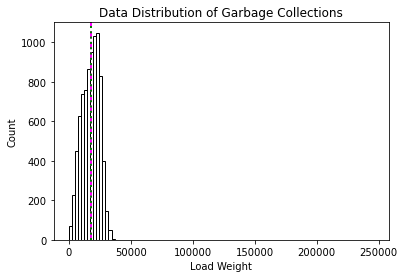

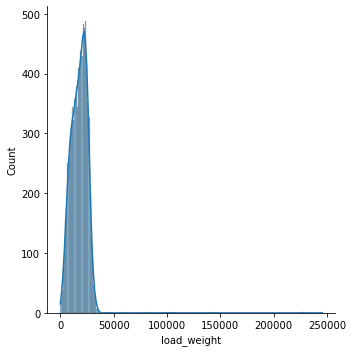

In [54]:
### HISTOGRAM DENGAN AXIS LINE
b = garbage_collections['load_weight']
plt.hist(garbage_collections['load_weight'], color = 'white', edgecolor = 'black',
         bins = int(500/5))

plt.title('Data Distribution of Garbage Collections')
plt.xlabel('Load Weight')
plt.ylabel('Count')
plt.axvline(b.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(b.median(), color='green', linestyle='dotted', linewidth=2)
plt.show


### displot
sns.displot(garbage_collections.load_weight, kde=True, label='Load Weight of Garbage Collections')

Because the `garbage_collections` data has a right skewed data distribution, there are outliers in the `garbage_collections` data. Outliers are data points that are far from other data points.

The next step to do is to handle outliers.

Some popular concepts for dealing with outliers are:

- Dropping outliers
- Limit them - i.e. define max/min point and assign that value to outlier. This applies if the data shows that after some point the larger/smaller value does not change the result.
- Double check - they could have entered the value incorrectly or so.

<AxesSubplot:ylabel='load_weight'>

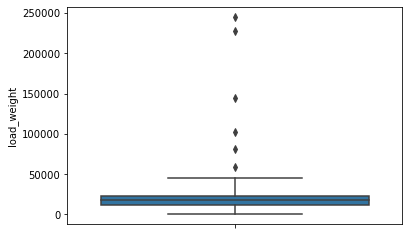

In [55]:
sns.boxplot(data=garbage_collections, y='load_weight', whis=3)

In [56]:
Q1_garbage_collections = garbage_collections['load_weight'].quantile(q=0.25)
Q3_garbage_collections = garbage_collections['load_weight'].quantile(q=0.75)
IQR_garbage_collections = garbage_collections['load_weight'].quantile(q=0.75) - garbage_collections['load_weight'].quantile(q=0.25)

print(f'Q1 : {Q1_garbage_collections}')
print(f'Q3 : {Q3_garbage_collections}')
print(f'IQR : {IQR_garbage_collections}')

Q1 : 12040.0
Q3 : 23080.0
IQR : 11040.0


In [57]:
lower_bound_garbage_collections = (garbage_collections["load_weight"].quantile(0.25)) - (3 * IQR_garbage_collections)
upper_bound_garbage_collections = (garbage_collections["load_weight"].quantile(0.75)) + (3 * IQR_garbage_collections)
upper_bound_garbage_collections

56200.0

In [58]:
# PERCENTILES OF THE OUTLIERS

data_outlier_dua = garbage_collections[garbage_collections.load_weight > 56200.0]
jumlah_data_outlier_dua = data_outlier_dua.load_weight.count()
jumlah_data_garbage_collections = garbage_collections.load_weight.count()

outliers_percentage_dua = (jumlah_data_outlier_dua/jumlah_data_garbage_collections)*100
outliers_percentage_dua

0.073117231294175

In the `garbage_collections` data, the number of outliers in the data only adds up to 6 data. Data `garbage_collections` has a total of 8206 rows of data. **The percentage of extreme value is 0.07% of the total data**. The number of extreme value is still very small when compared to the total amount of data. So I will use the capping method to handle the extreme values. 

Since the `garbage_collections` data is right skewed, the way to detect outliers is to look for values that are above the IQR (Interquartile Range). The formula is Q3 + (3 * IQR)

In [59]:
garbage_collections[garbage_collections['load_weight']>56200.0]

,report_date,load_time,load_type,load_weight,dropoff_site
5176,2021-02-09,2021-02-09 01:08:00 UTC,GARBAGE COLLECTIONS,102680.0,TDS LANDFILL
8680,2021-03-09,2021-03-09 01:30:00 UTC,GARBAGE COLLECTIONS,145160.0,TDS LANDFILL
12021,2021-03-29,2021-03-29 05:08:00 UTC,GARBAGE COLLECTIONS,58600.0,TDS LANDFILL
20368,2021-05-26,2021-05-26 11:40:00 UTC,GARBAGE COLLECTIONS,80697.0,TDS LANDFILL
20553,2021-05-27,2021-05-27 11:33:00 UTC,GARBAGE COLLECTIONS,245540.0,TDS LANDFILL
23798,2021-06-21,2021-06-21 01:05:00 UTC,GARBAGE COLLECTIONS,227780.0,TDS LANDFILL


In [60]:
garbage_collections["load_weight"] = np.where(garbage_collections['load_weight']>56200.0, 56200.0,garbage_collections['load_weight'])
garbage_collections

,report_date,load_time,load_type,load_weight,dropoff_site
14591,2021-04-14,2021-04-14 11:35:00 UTC,GARBAGE COLLECTIONS,780.0,STEINER LANDFILL
19600,2021-05-20,2021-05-20 11:25:00 UTC,GARBAGE COLLECTIONS,16020.0,WESTFIELD
20,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL
21,2021-01-02,2021-01-02 12:00:00 UTC,GARBAGE COLLECTIONS,13020.0,TDS LANDFILL
22,2021-01-02,2021-01-02 01:34:00 UTC,GARBAGE COLLECTIONS,17340.0,TDS LANDFILL
...,...,...,...,...,...
26093,2021-07-08,2021-07-08 11:10:00 UTC,GARBAGE COLLECTIONS,14500.0,TDS LANDFILL
26094,2021-07-08,2021-07-08 04:23:00 UTC,GARBAGE COLLECTIONS,12560.0,TDS LANDFILL
26095,2021-07-08,2021-07-08 04:20:00 UTC,GARBAGE COLLECTIONS,13360.0,TDS LANDFILL
26096,2021-07-08,2021-07-08 11:39:00 UTC,GARBAGE COLLECTIONS,20180.0,TDS LANDFILL


In [61]:
garbage_collections['load_weight'].max()

56200.0

The command above has done the capping of the existing outliers with proven maximum value changed to 39640.0

Below is the plotting of `garbage_collections` data after capping.

In [62]:
print(garbage_collections['load_weight'].skew())

-0.07329757486331162


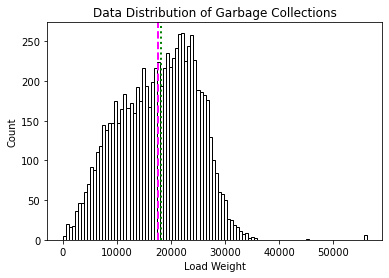

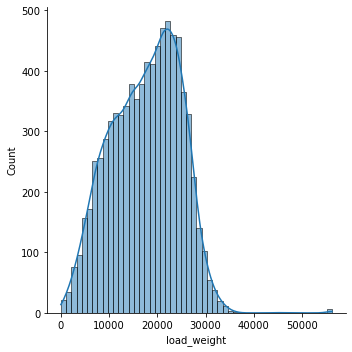

In [63]:
### HISTOGRAM DENGAN AXIS LINE
b = garbage_collections['load_weight']
plt.hist(garbage_collections['load_weight'], color = 'white', edgecolor = 'black',
         bins = int(500/5))

plt.title('Data Distribution of Garbage Collections')
plt.xlabel('Load Weight')
plt.ylabel('Count')
plt.axvline(b.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(b.median(), color='green', linestyle='dotted', linewidth=2)
plt.show


### displot
sns.displot(garbage_collections.load_weight, kde=True, label='Load Weight of Garbage Collections')

<AxesSubplot:ylabel='load_weight'>

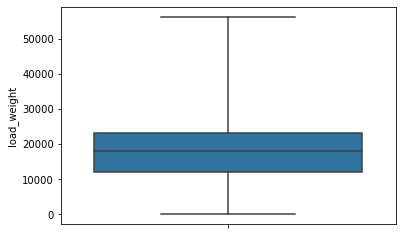

In [64]:
sns.boxplot(data=garbage_collections, y='load_weight', whis=3)

**The following is a comparison of the mean, median, and mode of the data `garbage_collection` with outliers and `garbage_collection` without any extreme values.**

In [65]:
mean_dua_new = garbage_collections['load_weight'].mean()
median_dua_new = garbage_collections['load_weight'].median()
modus_dua_new = garbage_collections['load_weight'].mode()
standar_deviasi_dua_new = garbage_collections['load_weight'].std()
variance_dua_new = garbage_collections['load_weight'].var()

print(f'rata-rata : {mean_dua_new}')
print(f'median : {median_dua_new}')
print(f'modus : {modus_dua_new}')
print(f'standar deviasi : {standar_deviasi_dua_new}')
print(f'variance : {variance_dua_new}')

rata-rata : 17551.019441798682
median : 18140.0
modus : 0    21780.0
Name: load_weight, dtype: float64
standar deviasi : 7079.525463462363
variance : 50119680.78781199


In [66]:
perbandingan1 = pd.DataFrame({'Data Condition': ['With Outliers', 'Without Outliers'],
                   'Mean':[mean_dua,mean_dua_new],
                   'Median':[median_dua,median_dua_new],
                   'Variance':[variance_dua,variance_dua_new],
                   'Standar deviasi':[standar_deviasi_dua,standar_deviasi_dua_new],
                   })
perbandingan1

,Data Condition,Mean,Median,Variance,Standar deviasi
0,With Outliers,17614.784614,18140.0,6.430406e+07,8018.980998
1,Without Outliers,17551.019442,18140.0,5.011968e+07,7079.525463


Since the data is clear of extreme values, I will now calculate the range, variance, and standard deviation values.

In [67]:
max_garbage_collections = garbage_collections['load_weight'].max()
min_garbage_collections = garbage_collections['load_weight'].min()

range_recycling_single_stream = max_garbage_collections - min_garbage_collections
range_recycling_single_stream

56200.0

In [68]:
Variance_GC = garbage_collections["load_weight"].var()
Variance_GC

50119680.78781199

In [69]:
std_GC = garbage_collections["load_weight"].std()
std_GC

7079.525463462363

**From the results above, the information obtained is the diversity of the weight of waste disposal at the garbage collections type, the value of waste disposal at the garbage collections type is far from the average value.**


The standard deviation is derived from variance and tells you, on average, how far each value lies from the mean.

Both measures reflect variability in a distribution, but their units differ:

- **Standard deviation** is expressed in the same units as the original values (e.g., meters).
- **Variance is expressed** in much larger units (e.g., meters squared)

Since the units of variance are much larger than those of a typical value of a data set, it’s harder to interpret the variance number intuitively. That’s why standard deviation is often preferred as a main measure of variability.

However, the variance is more informative about variability than the standard deviation, and it’s used in making statistical inferences.

---

Furthermore, because the `df` data is clear of outliers, we can calculate the confidence interval for the garbage load capacity for the new drop off site.

CI (Confidence Interval) is a range of values where 95% of the garbage load that has occurred is in that range.

Now if the city government plans to add a new site. I have to provide analysis and suggestions regarding the amount of storage capacity at the new site based on the calculation of the confidence interval.

In [70]:
ci_GC = stats.norm.interval(0.95, garbage_collections['load_weight'].mean(), garbage_collections['load_weight'].std())
ci_GC

(3675.404505778215, 31426.63437781915)

Based on the above calculation results, **the heavy load capacity for the new site can be assessed in the range of 3675.40 kg to 31426.63 kg**.

This is because the calculation is based on the average load weight of all landfills. So, I suggest a capacity value of the new landfill that is within the average weight range of the landfill, which will result in a possible overload in the new landfill.

---

All samples have been cleaned of all outliers. Now, I want to know if the average `load_weight` of the `recycling single stream type` data is significantly different from the average of the `garbage collections type`?

My hypothesis on this case:

H0: μ_recycling single stream = μ_garbage collections

H1: μ_recycling single stream != μ_garbage collections

In [71]:
recycling_single_stream_ = recycling_single_stream.groupby('report_date')['load_weight'].sum()
garbage_collections_ = garbage_collections.groupby('report_date')['load_weight'].sum()

print('Average load weight of recycling single stream: {}'.format(np.round(recycling_single_stream_.mean())))
print('Average load weight of garbage collections: {}'.format(np.round(garbage_collections_.mean())))

Average load weight of recycling single stream: 491846.0
Average load weight of garbage collections: 935219.0


I am going to use T-Test 2 sample 2 tailed method for the hypothesis testing

In [72]:
t_stat, p_val = stats.ttest_ind(recycling_single_stream_, garbage_collections_)
print('P-value:',p_val) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 2.0048793147551902e-23
t-statistics: -10.924163594661861


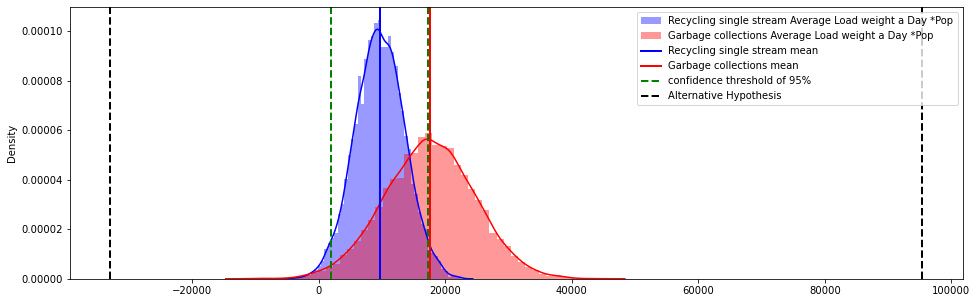

In [73]:
recycling_pop = np.random.normal(recycling_single_stream.load_weight.mean(),recycling_single_stream.load_weight.std(),10000)
garbage_pop = np.random.normal(garbage_collections.load_weight.mean(),garbage_collections.load_weight.std(),10000)

ci = stats.norm.interval(0.95, recycling_single_stream.load_weight.mean(), recycling_single_stream.load_weight.std())
plt.figure(figsize=(16,5))
sns.distplot(recycling_pop, label='Recycling single stream Average Load weight a Day *Pop',color='blue')
sns.distplot(garbage_pop, label='Garbage collections Average Load weight a Day *Pop',color='red')

plt.axvline(recycling_single_stream.load_weight.mean(), color='blue', linewidth=2, label='Recycling single stream mean')
plt.axvline(garbage_collections.load_weight.mean(), color='red',  linewidth=2, label='Garbage collections mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(recycling_pop.mean()+t_stat*recycling_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(garbage_pop.mean()-t_stat*garbage_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Based on the calculation results above, it can be shown that **H0 is rejected** so that it can be concluded that the average `load_weight` in the `recycle single stream type` is significantly different from the average of the `garbage collections type`.

#### Answering Questions

1. What technique did you choose for handling outliers? Explain why!

    - To handle outliers, I chose the capping method or censoring for both `recycling single stream` data and `garbage collections` data. This is because I want to avoid losing important data or having a significant influence on the characteristics of the data.


2. What is the concept behind the confidence interval so that we can use it to complete step 7?

    - A confidence interval is a range of values that describes the uncertainty surrounding an estimate. In my case, I set my confidence interval level to 95%, this indicates a level of certainty about our estimate. If we were to repeatedly make new estimates using exactly the same procedure, the confidence intervals would contain the average of all the estimates 95% of the time.
    - Simpler meaning is confidence intervals are one way to represent how "good" an estimate is; the larger a 90% confidence interval for a particular estimate, the more caution is required when using the estimate.


3. Explain what type of hypothesis test you used and why?

    - I used the T-test Two Sample Two Tailed method because the two sample t test compares the mean of samples data to a known value.

---

## Working Station Problem 2 (Math / Calculus)

### Problem Statement

The government wants to know how much garbage is loaded in kg in Austin the next day (10 July 2021). In this case, the government wants I to do forecasting to predict future values. There are many forecasting techniques that can be done but I will use a very simple method, namely using the velocity formula.

Assume that the rate of daily addition of waste can be written using the following formula:

<img src="https://latex2png.com/pngs/d095b902113a1ef68d07fd786e4be428.png"></img>

where `1` is today's notation and `0` is yesterday's notation.

If I want to predict the amount of garbage load tomorrow, I can use the formula:

<img src="https://latex2png.com/pngs/50dc63299a1860b10a15346a9ca3a42e.png"></img>

Where `v` will be calculated using the first derivative of the `load_weight` data which previously had to be grouped by `report_date` and don't forget after that `report_date` must be sorted from the smallest to the largest date. `Δt` **values 1** because it only wants to predict the value in one day ahead.

**Additional note**: To calculate the derivative, the x and y axes must be determined first. Set `load_weight` as the y-axis and for the x-axis, you can use the index of the groupby result dataframe if the index is a sequence number from 0 to N-1. If not, you can create it using `range()`.

To simplify it, the problem statement in this second math problem is to predict the `load_weight` value for 10 July 2021 by using the provided formula.

First of all, we will group by `report_date` column and add up the total load weight for each day and convert the grouping results into a dataframe which is then stored in the `delta_w` variable

In [74]:
delta_w = df.groupby('report_date')['load_weight'].sum().to_frame()
delta_w

,load_weight
report_date,
2021-01-01,0.0
2021-01-02,2170130.0
2021-01-04,2920260.0
2021-01-05,2388540.0
2021-01-06,2396550.0
...,...
2021-07-05,1897290.0
2021-07-06,1921640.0
2021-07-07,1553080.0


After that, according to the instructions described in the problem statement section, the next step is to differentiate `load_weight` against `Δt` or `delta_t`.

In [75]:
delta_t = range(len(delta_w))
delta_t

range(0, 166)

In [76]:
v = np.diff(delta_w.load_weight)/np.diff(delta_t)
v

array([ 2.17013000e+06,  7.50130000e+05, -5.31720000e+05,  8.01000000e+03,
        4.17800000e+04, -5.93380000e+05, -1.81681000e+06,  2.46847000e+06,
       -4.22690000e+05, -5.34000000e+03, -3.57300000e+04, -3.15860000e+05,
       -1.68213000e+06,  2.40679000e+06, -2.67390000e+05, -7.91300000e+04,
       -2.97600000e+04, -2.86770000e+05, -1.59572000e+06,  2.31477000e+06,
       -4.40200000e+05,  3.03900000e+04,  3.62200000e+04, -3.88890000e+05,
       -1.73503000e+06,  2.43934000e+06, -3.60620000e+05, -8.69800000e+04,
        1.16700000e+05, -3.72670000e+05, -1.73345000e+06,  1.17200000e+04,
        2.60815000e+06, -4.94950000e+05, -3.38800000e+04, -1.31158000e+06,
        1.08996000e+06, -1.83900000e+06,  1.05132000e+06,  2.66098000e+06,
       -5.04400000e+05,  7.47900000e+04,  6.37300000e+04, -9.73200000e+05,
       -2.16812000e+06,  1.59200000e+04,  2.95084000e+06, -2.95220000e+05,
       -1.06440000e+05, -3.87200000e+04, -3.54825000e+05, -2.17421500e+06,
       -5.08200000e+04,  

And if I want to predict the amount of garbage load tomorrow, then I will use the formula below:

In [77]:
W_tomorrow = delta_w['load_weight'][-1] + v[-1] * 1
abs(W_tomorrow)

1176970.0

By the calculation above, in 10th July 2021 is predicted will be having **1176970.0.0 kg** of garbage.

#### Answering Questions

1. To calculate the first derivative can be used symbolic and numerical methods, for this case, what technique do you use?
    - I used numerical method to calculate the first derivative.
2. Do you need a mathematical function to calculate the derivative? (yes/no) give your reasons!
    - Yes. Because the derivative is the instantaneous rate of change of a function with respect to one of its variables.
3. How much load weight do you expect tomorrow (10 July 2021)?
    - I estimate there will be **1176970.0.0 kg** of garbage

---

## Conclusions, Assumptions, Overall Analysis

From the data that I have analyzed, I have come to the conclusions of: 

1. The overall waste of Austin City will increase exponentially. Thus, a stronger and more sustainable waste management is needed.

2. Garbage collections have an average load weight value greater than single stream recycling with a value of 17551 kg or about 17.5 tons for 6 months. Based on the analysis data, it can be suggested that the garbage collection system should be updated and distributed properly in the city, considering the average load weight is not small. If the government wants to add a new site, it is recommended to provide garbage containers with a load of more than 31426.6 kg or 31.4 tons for 6 months and can be socialized for household waste must not contain hazardous or flammable materials and do not place hot ash, coal, dirt, stone, concrete, tiles, shingles, sheet metal or household hazardous waste (paint, oil, corrosive, battery, etc.) in the bin.

3. The average load weight for 6 months in the Garbage collections type is greater than the Recycling single stream type. This is because single stream recycling does not have to filter and sort, so consumers only throw away all recyclable items in the same container, besides that it has the advantage of reducing government costs in collecting and managing waste in the single stream recycling type. However, from the results of the analysis, it can be suggested for the Austin Smart City government, if you want to add a new site for waste disposal, it is more focused on the single stream recycling type to load recycling collection trucks with a capacity greater than 17263.7 kg or about 17.3 ton.

4. I estimate there will be 1176970.0.0 kg of waste on 10 July 2021.